### Import cytview, pandas and matplotlib


In [1]:
import cytview as cv
import pandas as pd
import matplotlib.pyplot as plt

### Read your experimental results into a pandas dataframe

In [2]:
"""
Read the dataset into python as a DataFrame object using pandas. An example dataset 
has been included within this project to assist with formatting the input table. In this
case "MetaData_Well" is our single-cell identifier and "Measurment_1" is the feature
we are interested in analysing. It is important that the measurements are numerical.
"""

df = pd.read_csv("dataset/experiment.csv")
df.head()

,ImageNumber,ObjectNumber,Metadata_Well,Measurement_1,Measurement_2
0,1,1,A04,0.008475,0.169154
1,1,2,A04,0.010526,0.114011
2,1,3,A04,0.006295,0.052348
3,1,4,A04,0.006414,0.006516
4,1,5,A04,0.005213,0.059943


### Plot and analyse your measurments of interest

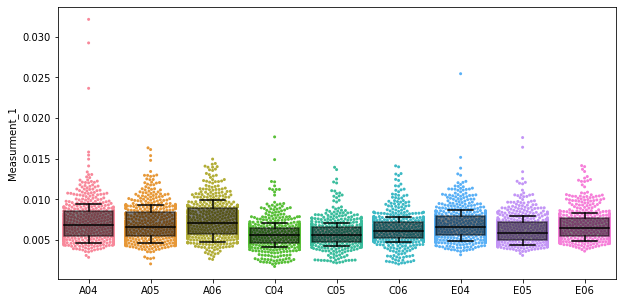

In [3]:
"""
Use cell_plot() to randomly sample a subset of experimental observations and plot the data.
CytView makes use of seaborn's swarmplot() and boxplot() functions and thus any plot-related
parameters can be tweaked using matplotlib. Note: the default number of observations sampled
is 500, this can be changed using the obs_max argument.
"""

plt.figure(figsize=[10,5])
plot = cv.cell_plot(df, measurement= "Measurement_1", identifier= "Metadata_Well")
plt.ylabel("Measurment_1")
plt.show()

In [4]:
"""
cell_plot() returns a dictionary containing both the sampled dataframe and summarised results
"""

# show the sampled dataframe
plot["dataframe"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
1071,0.008548,0.005236,0.006397,0.005926,0.009821,0.006943,0.009416,0.008202,0.006544
2360,0.005535,0.005668,0.003789,0.008447,0.005826,0.004612,0.004013,0.005551,0.004644
1416,0.008733,0.004293,0.008352,0.006483,0.004487,0.004825,0.006092,0.005151,0.009851
2275,0.005242,0.007027,0.011211,0.005157,0.005620,0.006740,0.004924,0.008916,0.004889
2603,0.006303,0.006009,0.004529,0.005886,0.006046,0.005498,0.007067,0.008558,0.005748
...,...,...,...,...,...,...,...,...,...
4149,0.007083,0.008890,0.009340,0.007176,0.004953,0.004918,0.007351,0.008945,0.005926
2853,0.005116,0.004601,0.006362,0.005701,0.005993,0.006458,0.007154,0.005478,0.006416
4694,0.007891,0.007360,0.004425,0.005631,0.004690,0.007120,0.007046,0.007171,0.010277
1154,0.006037,0.007060,0.004535,0.008415,0.005454,0.006738,0.006300,0.005586,0.006731


In [5]:
# summary of dataframe including mean, standard deviation, interquartile ranges and min/max values.
plot["summary"]

,A04,A05,A06,C04,C05,C06,E04,E05,E06
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.007327,0.007088,0.007462,0.005701,0.005785,0.006322,0.006966,0.006333,0.006815
std,0.002752,0.002245,0.002304,0.001811,0.001674,0.001886,0.002088,0.001837,0.001824
min,0.002859,0.002052,0.002597,0.001737,0.002175,0.002029,0.003174,0.003098,0.003621
25%,0.005508,0.005501,0.005711,0.004657,0.004771,0.005284,0.005568,0.004998,0.005516
50%,0.006873,0.006633,0.007139,0.005572,0.005572,0.006123,0.006573,0.005896,0.006487
75%,0.008502,0.008473,0.008938,0.006514,0.006558,0.007219,0.008007,0.007252,0.007701
max,0.032148,0.016334,0.014950,0.017681,0.013940,0.014117,0.025457,0.017601,0.014149


Sample 1 vs Sample 2 : p value:  0.00119  ( ** )
Sample 2 vs Sample 3 : p value:  0.01943  ( * )


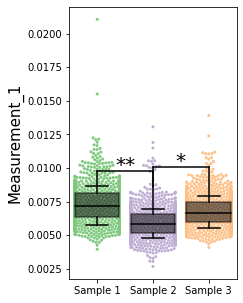

In [6]:
"""
If you have replicate samples you can utilise the group_plot() function to merge, plot
and perform statistics on your dataset. Note: you need to specify at least 2 independent 
replicates in order to use this function.
"""

plt.figure(figsize=[3,5])


"""
Define your groupings as set out below. In this case we're interested in comparing wells
A04, A05, A06 versus C04, C05, C06 versus E04, E05, E06. 
"""
groupings =  [["A04", "A05", "A06"],
              ["C04", "C05", "C06"],
              ["E04", "E05", "E06"]]

# Provide user-defined labels for each grouping
labels = ["Sample 1", "Sample 2", "Sample 3"]

"""
Choose which groups to compare by their indexes, this will perform a one-way ANOVA
between the means of Sample 1 vs Sample 2 as well as Sample 2 vs Sample 3.
"""
compare = [[0,1],[1,2]]

"""
Plot the data and specify the groupings, labels and comparisons with the function arguments.
Note: set draw = True in order to draw lines between groups and visualise statistical significance. 
"""

plot = cv.group_plot(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", 
                     groupings=groupings, labels = labels, compare=compare, draw=True)

    

In [7]:
"""
View the grouped dataframe. Note: similarly to the cell_plot() function the data has been down-sampled. 
In order to adjust the number of observations sampled (default: 500) change the obs_max parameter.
"""

plot["dataframe"]

,Sample 1,Sample 2,Sample 3
3433,0.006692,0.006169,0.006544
1297,0.006974,0.006839,0.005523
3135,0.006814,0.006336,0.009165
2822,0.007223,0.005459,0.007829
3516,0.006479,0.005617,0.004799
...,...,...,...
4886,0.008568,0.005305,0.007633
900,0.005859,0.004956,0.007638
4666,0.006884,0.005396,0.011043
2239,0.006663,0.005234,0.007848


In [8]:
# Summary of grouped dataframe including mean, standard deviation, interquartile ranges and min/max values.

plot["summary"]

,Sample 1,Sample 2,Sample 3
count,1000.000000,1000.000000,1000.000000
mean,0.007305,0.005944,0.006810
std,0.001452,0.001180,0.001205
min,0.003957,0.002672,0.004081
25%,0.006319,0.005187,0.005990
50%,0.007166,0.005814,0.006626
75%,0.008141,0.006566,0.007468
max,0.021068,0.013067,0.013912


In [10]:
"""
CytView also allows you to directly perform measurement extraction and down-sampling 
if you wish to independently analyse the data outside of python (eg. in R, SPSS, GraphPad, Excel)
"""

values = cv.extract_values(dataframe=df, measurement="Measurement_1", identifier="Metadata_Well", obs_max=1000)
values.head()


,A04,A05,A06,C04,C05,C06,E04,E05,E06
4263,0.004712,0.006953,0.008078,0.007105,0.006618,0.003881,0.006914,0.004731,0.007228
215,0.007706,0.006231,0.006557,0.005733,0.006284,0.006495,0.005360,0.015164,0.008364
3282,0.008242,0.007262,0.006626,0.005640,0.004962,0.006704,0.006642,0.006884,0.011294
537,0.007860,0.009239,0.009629,0.005795,0.007282,0.006107,0.009973,0.006969,0.005369
56,0.011488,0.008894,0.006571,0.004813,0.004770,0.006403,0.011827,0.008178,0.007046
